# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "71d4e9c405acc3f595ff62eaf96806127d921292"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool


In [ ]:
! wget -O stochastic_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/stochastic_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' stochastic_crossover.py

In [5]:
from stochastic_crossover import StochasticCrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 134223,
 'strategyId': '9b8e09e4326a4b71bd30eb9c7cde09bc'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('RELIANCE', exchange='NSE')
instrument

[{'id': 87262, 'value': 'NSE:RCOM'},
 {'id': 111920, 'value': 'NSE:RELCAPITAL'},
 {'id': 396, 'value': 'NSE:RELIANCE'},
 {'id': 1674243, 'value': 'NSE:RELIANCE.AF'},
 {'id': 1674337, 'value': 'NSE:RELIANCE.BL'},
 {'id': 1674465, 'value': 'NSE:RELIANCE.RL'},
 {'id': 1674886, 'value': 'NSE:RELIANCEP1'},
 {'id': 1674887, 'value': 'NSE:RELIANCEP1.BL'},
 {'id': 556791, 'value': 'NSE:RELIANCEP1.E1'},
 {'id': 1674737, 'value': 'NSE:RELIANCEPP.BL'}]

## Setup Parameters

In [9]:
parameters = {
  'FASTK_PERIOD': 7,
  'SLOWK_PERIOD': 2,
  'SLOWD_PERIOD': 2
}

In [10]:
initial_virtual_funds = 70000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:RELIANCE', 
    lots=10,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Stochastic Crossover' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════════╕
│ Config                  │ Value                                                     │
╞═════════════════════════╪═══════════════════════════════════════════════════════════╡
│ Strategy Name           │ Stochastic Crossover                                      │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                               │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:RELIANCE']                                          │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 10                                                        │
├─────────────────────────┼────────────────────────

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTED', 'status': 2}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,RELIANCE,2022-07-27 15:15:00+05:30,BUY,10,₹,2419.40,2022-07-27 15:30:00+05:30,SELL,10,₹,2419.4,0.0,0.0,0,0.0
1,NSE,RELIANCE,2022-07-27 15:15:00+05:30,BUY,10,₹,2419.40,NaT,SELL,,None,,NaN,NaN,0,NaN
2,NSE,RELIANCE,2022-07-28 14:15:00+05:30,SELL,10,₹,2461.50,2022-07-28 15:30:00+05:30,BUY,10,₹,2457.9,36.0,36.0,0,36.0
3,NSE,RELIANCE,2022-07-29 11:15:00+05:30,BUY,10,₹,2495.00,2022-07-29 13:15:00+05:30,SELL,10,₹,2494.8,-2.0,34.0,0,-2.0
4,NSE,RELIANCE,2022-07-29 13:15:00+05:30,SELL,10,₹,2494.80,2022-07-29 15:15:00+05:30,BUY,10,₹,2508.15,-133.5,-99.5,0,-133.5
5,NSE,RELIANCE,2022-07-29 15:15:00+05:30,BUY,10,₹,2508.15,2022-07-29 15:30:00+05:30,SELL,10,₹,2508.15,0.0,-99.5,0,0.0
6,NSE,RELIANCE,2022-08-01 12:15:00+05:30,SELL,10,₹,2560.80,2022-08-01 14:15:00+05:30,BUY,10,₹,2573.0,-122.0,-221.5,0,-122.0
7,NSE,RELIANCE,2022-08-01 14:15:00+05:30,BUY,10,₹,2573.00,2022-08-01 15:15:00+05:30,SELL,10,₹,2568.65,-43.5,-265.0,0,-43.5
8,NSE,RELIANCE,2022-08-01 15:15:00+05:30,SELL,10,₹,2568.65,2022-08-01 15:30:00+05:30,BUY,10,₹,2568.65,0.0,-265.0,0,0.0
9,NSE,RELIANCE,2022-08-02 12:15:00+05:30,BUY,10,₹,2586.25,2022-08-02 13:15:00+05:30,SELL,10,₹,2577.95,-83.0,-348.0,0,-83.0


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2022-07-27
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      85.0%

Cumulative Return   4.95%
CAGR﹪              4.91%

Sharpe              0.73
Prob. Sharpe Ratio  88.28%
Sortino             1.24
Sortino/√2          0.88
Omega               1.14

Max Drawdown        -2.79%
Longest DD Days     77

Gain/Pain Ratio     0.22
Gain/Pain (1M)      2.05

Payoff Ratio        1.53
Profit Factor       1.14
Common Sense Ratio  1.75
CPC Index           0.75
Tail Ratio          1.53
Outlier Win Ratio   4.6
Outlier Loss Ratio  3.07

MTD                 -0.69%
3M                  -1.31%
6M                  -0.01%
YTD                 -0.17%
1Y                  5.1%
3Y (ann.)           4.91%
5Y (ann.)           4.91%
10Y (ann.)          4.91%
All-time (ann.)     4.91%

Avg. Drawdown       -0.7%
Avg. Drawdown Days  15
Recovery Factor     1.77
Ulcer Index         0.01
Serenity Index      0.63


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2022-07-27
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             85.0%

Cumulative Return          4.95%
CAGR﹪                     4.91%

Sharpe                     0.73
Prob. Sharpe Ratio         88.28%
Smart Sharpe               0.72
Sortino                    1.24
Smart Sortino              1.21
Sortino/√2                 0.88
Smart Sortino/√2           0.86
Omega                      1.14

Max Drawdown               -2.79%
Longest DD Days            77
Volatility (ann.)          2.65%
Calmar                     1.76
Skew                       0.88
Kurtosis                   2.11

Expected Daily %           0.01%
Expected Monthly %         0.37%
Expected Yearly %          2.44%
Kelly Criterion            5.36%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.27%
Expected Shortfall (cVaR)  -0.27%

Max Consecutive Wins       5
Max

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-05-15,2023-07-18,2023-07-31,77,-2.794685,-2.624986
2,2022-09-09,2022-09-26,2022-10-19,39,-1.774075,-1.710419
3,2023-01-04,2023-02-03,2023-02-15,41,-1.632559,-1.569093
4,2023-02-23,2023-03-08,2023-03-15,20,-1.560992,-1.430965
5,2022-10-20,2022-11-11,2022-11-28,38,-1.156993,-1.029053


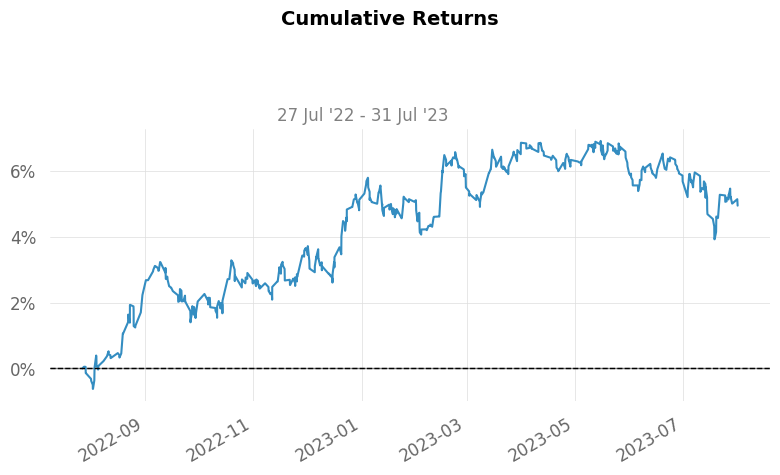

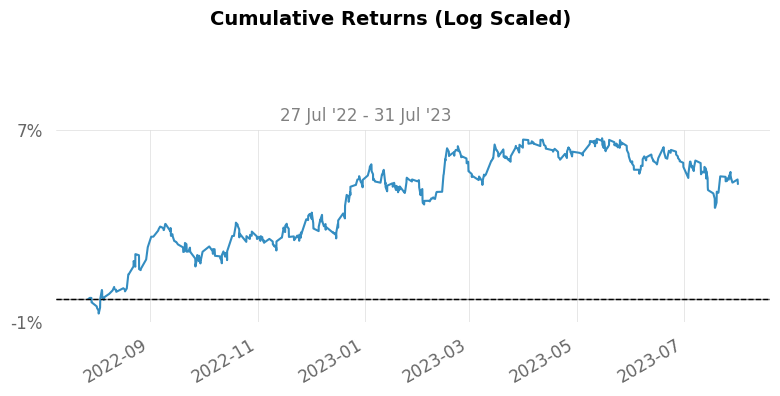

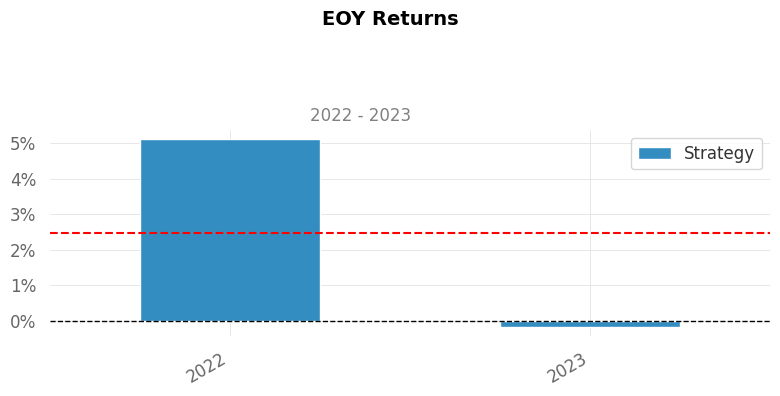

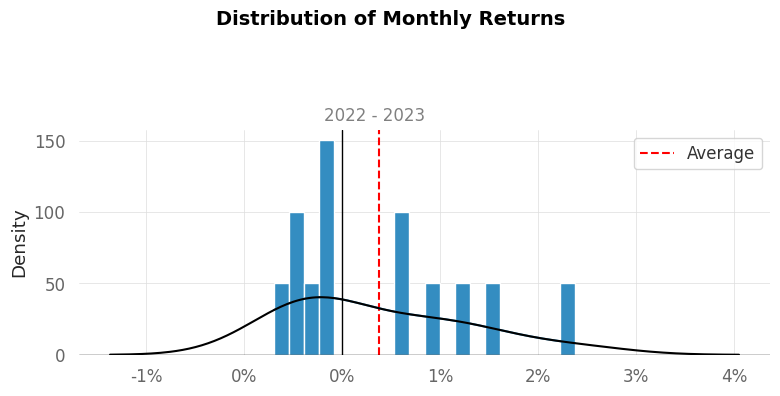

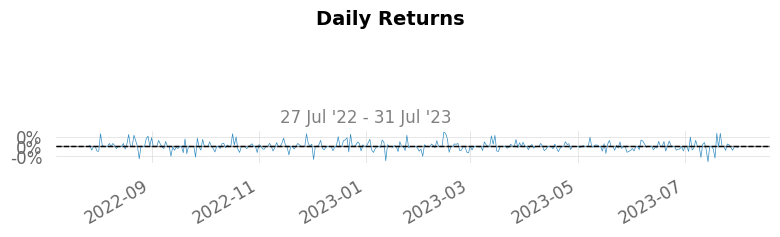

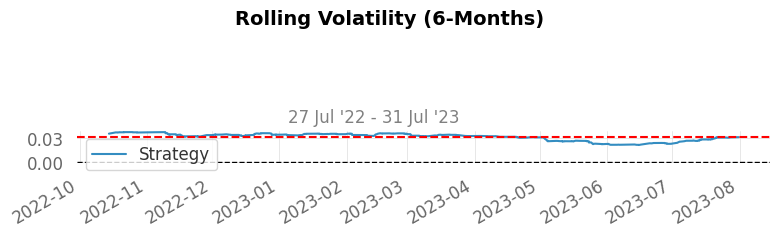

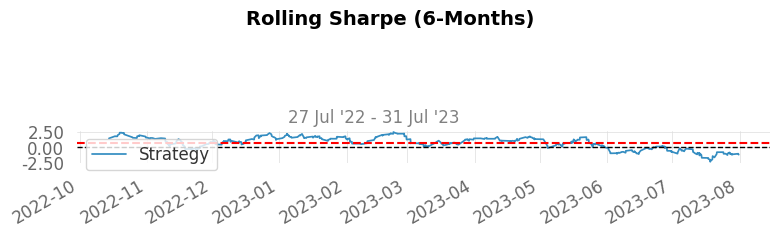

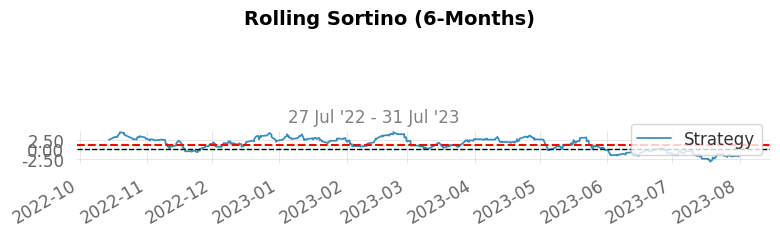

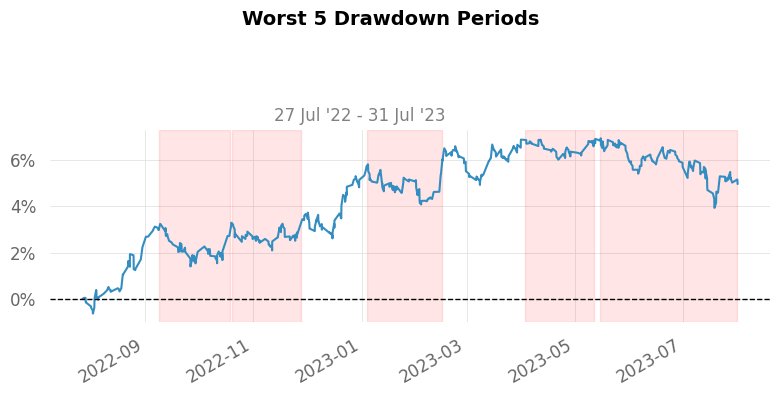

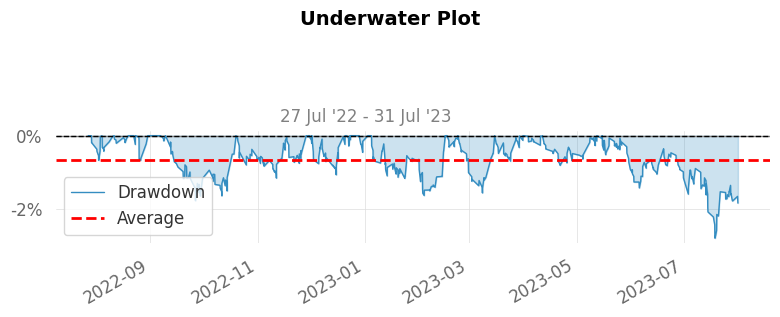

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


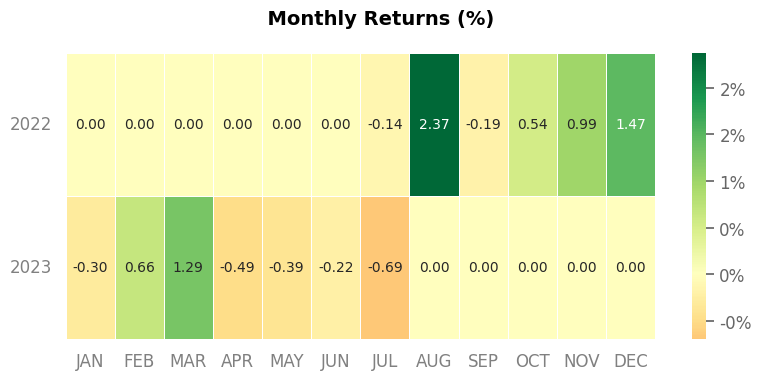

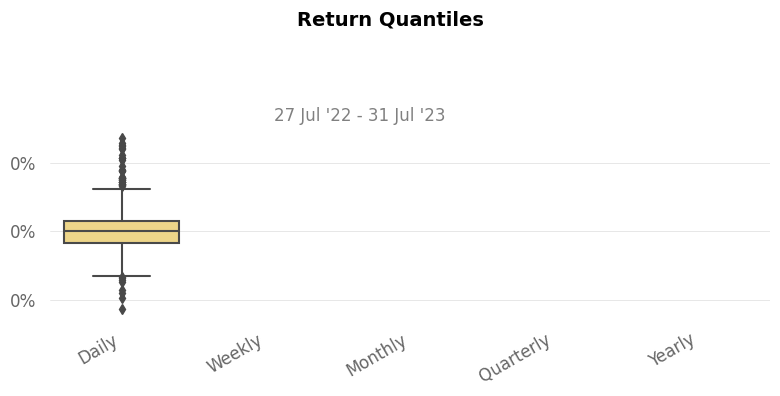

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True )

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | c01450ca40ef47938320f652f7e8d701 |
| Transaction Type | BUY                              |
| Instrument       | NSE:RELIANCE                     |
| Quantity         | 10                               |
| Price            | ₹2550.7                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-23T13:53:36.633807Z | COMPLETE               |
| 2023-10-23T13:53:36.633790Z | OPEN                   |
| 2023-10-23T13:53:36.633772Z | OPEN PENDING           |
| 2023-10-23T13:53:36.633750Z | VALIDATION PENDING     |
| 2023-10-23T13:53:36.633697Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 12dd6dd288984ae1a

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:RELIANCE', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---